# Analyse Exploratoire

### Import des modules

In [465]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

### Analyse Exploratoire

In [466]:
building_consumption = pd.read_csv("2016_Building_Energy_Benchmarking.csv")

In [467]:
# On regarde comment un batiment est défini dans ce jeu de données 
building_consumption.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [468]:
# On regarde le nombre de valeurs manquantes par colonne ainsi que leur type 
building_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [469]:
print('Nombre de lignes', len(building_consumption))

Nombre de lignes 3376


#### TERMINER L'ANALYSE EXPLORATOIRE 

A réaliser : 
- Une analyse descriptive des données, y compris une explication du sens des colonnes gardées, des arguments derrière la suppression de lignes ou de colonnes, des statistiques descriptives et des visualisations pertinentes.

Qelques pistes d'analyse : 

* Identifier les colonnes avec une majorité de valeurs manquantes ou constantes en utilisant la méthode value_counts() de Pandas
* Mettre en evidence les différences entre les immeubles mono et multi-usages
* Utiliser des pairplots et des boxplots pour faire ressortir les outliers ou des batiments avec des valeurs peu cohérentes d'un point de vue métier 

Pour vous inspirer, ou comprendre l'esprit recherché dans une analyse exploratoire, vous pouvez consulter ce notebook en ligne : https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python. Il ne s'agit pas d'un modèle à suivre à la lettre ni d'un template d'analyses attendues pour ce projet. 

In [470]:
# Les différents types de batiments
building_consumption['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

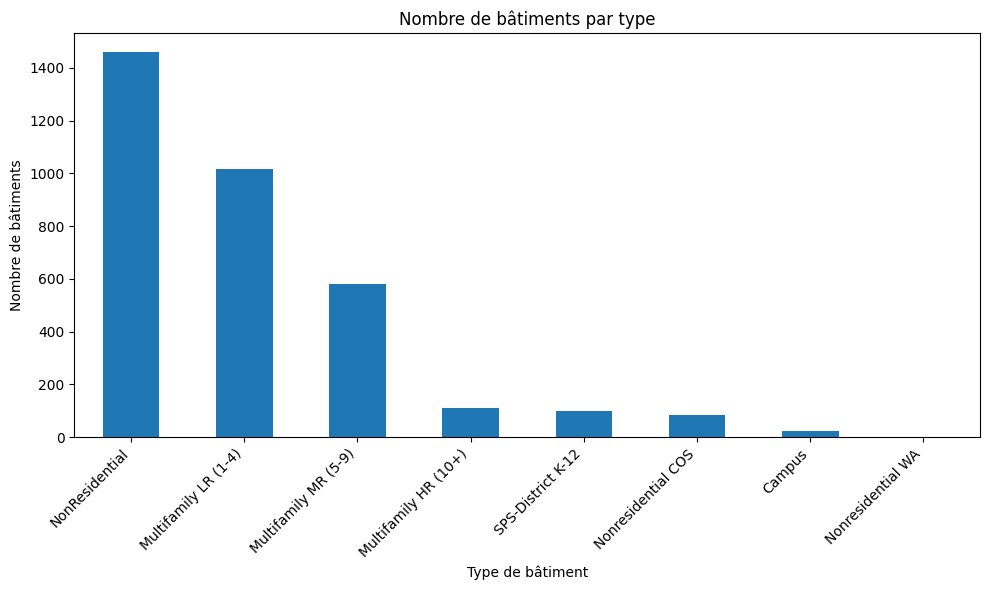

In [471]:
#Nombre de batiment par type building

building_counts = building_consumption['BuildingType'].value_counts()

# Créer le graphique
plt.figure(figsize=(10, 6))
building_counts.plot(kind='bar')

# Ajouter titres et étiquettes
plt.title("Nombre de bâtiments par type")
plt.xlabel("Type de bâtiment")
plt.ylabel("Nombre de bâtiments")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [472]:
# Suppresion des types résidentiels

building_consumption.drop(building_consumption[building_consumption['BuildingType']  == 'Multifamily LR (1-4)'].index, inplace=True)
building_consumption.drop(building_consumption[building_consumption['BuildingType']  == 'Multifamily MR (5-9)'].index, inplace=True)
building_consumption.drop(building_consumption[building_consumption['BuildingType']  == 'Multifamily HR (10+)'].index, inplace=True)


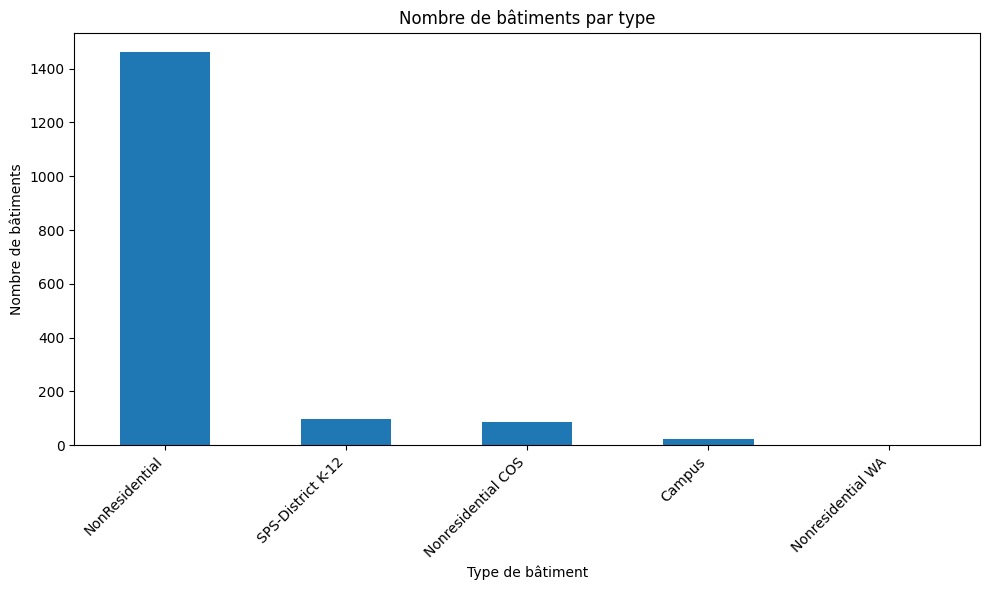

In [473]:
building_counts = building_consumption['BuildingType'].value_counts()

# Créer le graphique
plt.figure(figsize=(10, 6))
building_counts.plot(kind='bar')

# Ajouter titres et étiquettes
plt.title("Nombre de bâtiments par type")
plt.xlabel("Type de bâtiment")
plt.ylabel("Nombre de bâtiments")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [474]:
#Nombre de colonne 
print("Nombre de colonnes Avant :", len(building_consumption.columns))


Nombre de colonnes Avant : 46


In [475]:
# Analyse valeur constante

for col in building_consumption.columns:
    vc = building_consumption[col].value_counts(dropna=False)
    missing_ratio = building_consumption[col].isnull().mean()
    if len(vc) == 1:
        print(f"{col} est constante : {vc.index[0]}")
        building_consumption.drop(columns=col, inplace=True)
    elif missing_ratio > 0.5:
        print(f"{col} → {missing_ratio:.1%} de valeurs manquantes")
       


DataYear est constante : 2016
City est constante : Seattle
State est constante : WA
ThirdLargestPropertyUseType → 78.8% de valeurs manquantes
ThirdLargestPropertyUseTypeGFA → 78.8% de valeurs manquantes
YearsENERGYSTARCertified → 94.1% de valeurs manquantes
Comments est constante : nan
Outlier → 99.0% de valeurs manquantes


In [476]:
# Identifiant du batiment

building_consumption['OSEBuildingID'].head()

0    1
1    2
2    3
3    5
4    8
Name: OSEBuildingID, dtype: int64

In [477]:
# Nom du batiment

building_consumption['PropertyName'].head()

0           Mayflower park hotel
1                Paramount Hotel
2        5673-The Westin Seattle
3                      HOTEL MAX
4    WARWICK SEATTLE HOTEL (ID8)
Name: PropertyName, dtype: object

In [478]:
# Adresse du batiment

building_consumption['Address'].head()

0      405 Olive way
1    724 Pine street
2    1900 5th Avenue
3     620 STEWART ST
4      401 LENORA ST
Name: Address, dtype: object

In [479]:
# Numero Tax Administratif

building_consumption['TaxParcelIdentificationNumber'].head()

0    0659000030
1    0659000220
2    0659000475
3    0659000640
4    0659000970
Name: TaxParcelIdentificationNumber, dtype: object

In [ ]:
# Numero Tax Administratif

building_consumption['DefaultData'].unique()

array(['Compliant', 'Error - Correct Default Data', 'Missing Data',
       'Non-Compliant'], dtype=object)

In [481]:
colonnes = [
    'OSEBuildingID',
    'PropertyName',
    'Address',
    'TaxParcelIdentificationNumber',
    'DefaultData',
]

building_consumption.drop(columns=colonnes, inplace=True)


In [482]:
# Traiment des outlier
print(building_consumption['Outlier'].unique())
building_consumption = building_consumption[building_consumption['Outlier'].isna()]
print(building_consumption['Outlier'].unique())


[nan 'High outlier' 'Low outlier']
[nan]


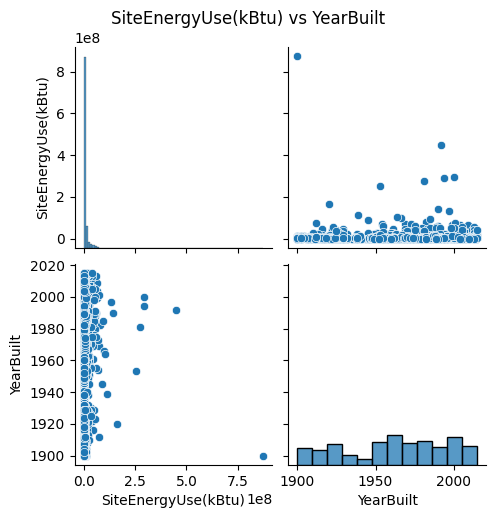

In [483]:
# SiteEnergyUse(kBtu) comparer date de construction

df = building_consumption[['SiteEnergyUse(kBtu)', 'YearBuilt']].dropna()

sns.pairplot(df)
plt.suptitle("SiteEnergyUse(kBtu) vs YearBuilt", y=1.02)
plt.show()

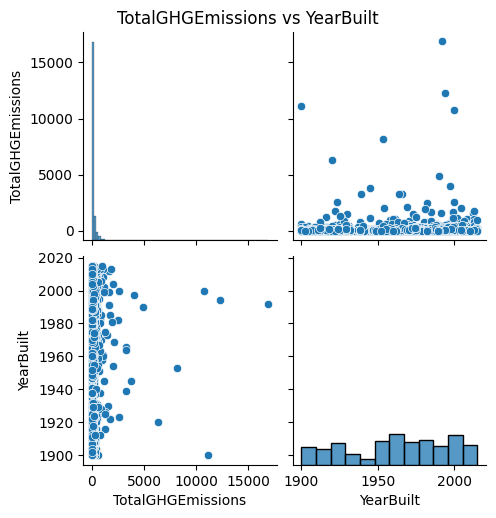

In [484]:
# TotalGHGEmissions comparer date de construction

df = building_consumption[['TotalGHGEmissions', 'YearBuilt']].dropna()

sns.pairplot(df)
plt.suptitle("TotalGHGEmissions vs YearBuilt", y=1.02)
plt.show()

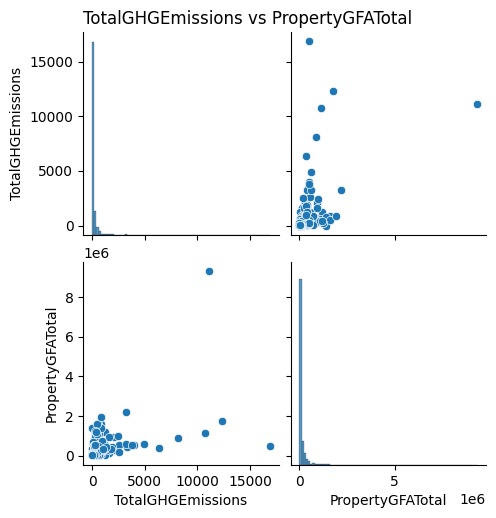

In [485]:
# TotalGHGEmissions comparer Sufrace batiment (PropertyGFATotal)

df = building_consumption[['TotalGHGEmissions', 'PropertyGFATotal']].dropna()

sns.pairplot(df)
plt.suptitle("TotalGHGEmissions vs PropertyGFATotal", y=1.02)
plt.show()

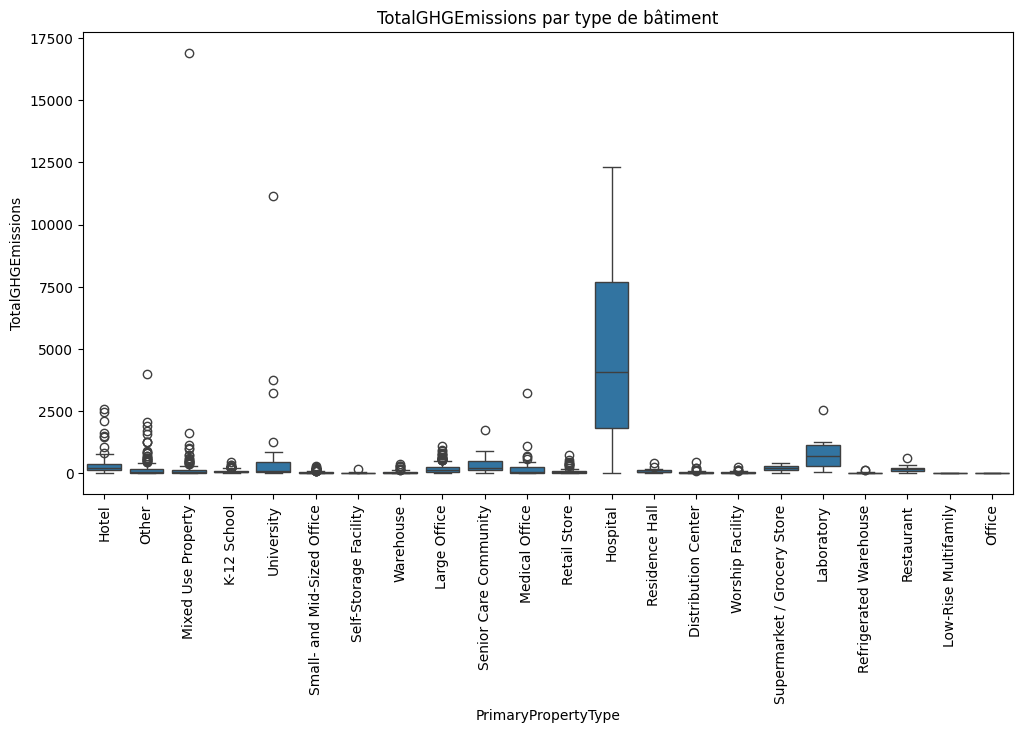

In [486]:
# TotalGHGEmissions comparer Type batiment (PrimaryPropertyType)

df = building_consumption[['TotalGHGEmissions', 'PrimaryPropertyType']].dropna()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='PrimaryPropertyType', y='TotalGHGEmissions')
plt.xticks(rotation=90)
plt.title("TotalGHGEmissions par type de bâtiment")
plt.show()

In [487]:
print("Nombre de colonnes Après :", len(building_consumption.columns))
print('Nombre de lignes', len(building_consumption))

Nombre de colonnes Après : 37
Nombre de lignes 1651


# Modélisation 

### Import des modules 

In [488]:
#Selection
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV, 
    cross_validate,
)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
from sklearn.inspection import permutation_importance

#Preprocess
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

#Modèles
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor


ModuleNotFoundError: No module named 'sklearn'

### Feature Engineering

A réaliser : Enrichir le jeu de données actuel avec de nouvelles features issues de celles existantes. 

En règle générale : On utilise la méthode .apply() de Pandas pour créer une nouvelle colonne à partir d'une colonne existante. N'hésitez pas à regarder les exemples dans les chapitres de cours donnés en ressource

In [ ]:
# CODE FEATURE ENGINEERING

### Préparation des features pour la modélisation

A réaliser :
* Si ce n'est pas déjà fait, supprimer toutes les colonnes peu pertinentes pour la modélisation.
* Tracer la distribution de la cible pour vous familiariser avec l'ordre de grandeur. En cas d'outliers, mettez en place une démarche pour les supprimer.
* Débarrassez-vous des features redondantes en utilisant une matrice de corrélation de Pearson. Pour cela, utiisez la méthode corr() de Pandas, couplé d'un graphique Heatmap de la librairie Seaborn 
* Réalisez différents graphiques pour comprendre le lien entre vos features et la target (boxplots, scatterplots, pairplot si votre nombre de features numériques n'est pas très élevé).
*  Séparez votre jeu de données en un Pandas DataFrame X (ensemble de feautures) et Pandas Series y (votre target).
* Si vous avez des features catégorielles, il faut les encoder pour que votre modèle fonctionne. Les deux méthodes d'encodage à connaitre sont le OneHotEncoder et le LabelEncoder

In [ ]:
# CODE PREPARATION DES FEATURES

### Comparaison de différents modèles supervisés

A réaliser :
* Pour chaque algorithme que vous allez tester, vous devez :
    * Réaliser au préalable une séparation en jeu d'apprentissage et jeu de test via une validation croisée.
    * Si les features quantitatives que vous souhaitez utiliser ont des ordres de grandeur très différents les uns des autres, et que vous utilisez un algorithme de regression qui est sensible à cette différence, alors il faut réaliser un scaling (normalisation) de la donnée au préalable.
    * Entrainer le modèle sur le jeu de Train
    * Prédire la cible sur la donnée de test (nous appelons cette étape, l'inférence).
    * Calculer les métriques de performance R2, MAE et RMSE sur le jeu de train et de test.
    * Interpréter les résultats pour juger de la fiabilité de l'algorithme.
* Vous pouvez choisir par exemple de tester un modèle linéaire, un modèle à base d'arbres et un modèle de type SVM
* Déterminer le modèle le plus performant parmi ceux testés.

In [ ]:
# CODE COMPARAISON DES MODELES

### Optimisation et interprétation du modèle

A réaliser :
* Reprennez le meilleur algorithme que vous avez sécurisé via l'étape précédente, et réalisez une GridSearch de petite taille sur au moins 3 hyperparamètres.
* Si le meilleur modèle fait partie de la famille des modèles à arbres (RandomForest, GradientBoosting) alors utilisez la fonctionnalité feature importance pour identifier les features les plus impactantes sur la performance du modèle. Sinon, utilisez la méthode Permutation Importance de sklearn.

In [ ]:
# CODE OPTIMISATION ET INTERPRETATION DU MODELE